In [1]:
'''
Imports
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
import numpy as np




In [ ]:
outfield_df = pd.read_csv("outfield_model_data2021-2022.csv")
keeper_df = pd.read_csv("goalkeeper_model_data2021-2022.csv")

In [2]:
numerical_cols = ['total_points', 'Min_last_5', 'xG_last_5', 'xA_last_5', 'xG_over_5_att',
'xG_over_5_def', 'xG_over_5_opp_att', 'xG_over_5_opp_def']
numerical_outfield = outfield_df[numerical_cols]

<AxesSubplot:>

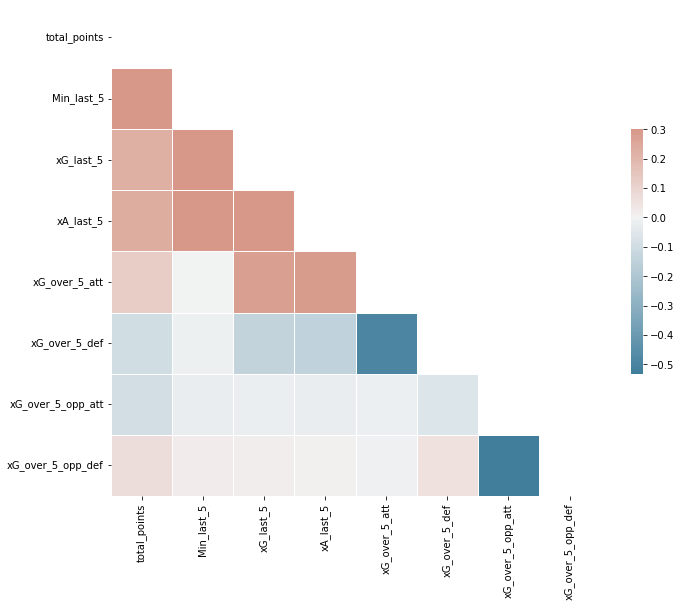

In [3]:
corr = numerical_outfield.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model Fitting

In [ ]:
# Setup
x_cols = ['Min_last_5', 'xG_last_5', 'xA_last_5', 'xG_over_5_att',
'xG_over_5_def', 'xG_over_5_opp_att', 'xG_over_5_opp_def']
y_cols = ['total_points']
x = numerical_outfield[x_cols]
y = numerical_outfield[y_cols]


poisson_glm = linear_model.PoissonRegressor()
